# Import Libraries

In [3]:
!pip install --upgrade tensorflow

     |██████████████████████████████▎ | 488.4MB 1.5MB/s eta 0:00:19

     |████████████████████████████████| 516.2MB 1.6kB/s  eta 0:00:01   |██████████████████████████████▌ | 492.0MB 1.5MB/s eta 0:00:17    |██████████████████████████████▊ | 495.3MB 1.5MB/s eta 0:00:15|██████████████████████████████▊ | 496.4MB 1.5MB/s eta 0:00:14|██████████████████████████████▉ | 498.0MB 804kB/s eta 0:00:23    |███████████████████████████████ | 499.3MB 804kB/s eta 0:00:21    |███████████████████████████████ | 500.9MB 804kB/s eta 0:00:20��█████████████████████████████ | 501.3MB 804kB/s eta 0:00:19B 804kB/s eta 0:00:183.3MB 804kB/s eta 0:00:16��███████████████▎| 505.3MB 30.1MB/s eta 0:00:01�██▍| 506.1MB 30.1MB/s eta 0:00:01     |███████████████████████████████▌| 508.3MB 30.1MB/s eta 0:00:01�██▌| 508.6MB 30.1MB/s eta 0:00:01�██▉| 512.7MB 30.1MB/s eta 0:00:01██████████████████████████████| 514.4MB 29.4MB/s eta 0:00:01██████████████████████████████| 516.0MB 29.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 587kB/s  eta 0:00:01
     |███████████████████████████

  Created wheel for wrapt: filename=wrapt-1.12.1-cp35-cp35m-linux_x86_64.whl size=68065 sha256=0101634dda8c1d5e7b5c050471e413830c3c7db73034b5bf14b2ccce997384e5
  Stored in directory: /home/nbuser/.cache/pip/wheels/b1/c2/ed/d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
  Created wheel for absl-py: filename=absl_py-0.9.0-cp35-none-any.whl size=119399 sha256=4262fccc239073661e3491f977938d647b95a29d0c7e1e2de7c08055517d09c1
  Stored in directory: /home/nbuser/.cache/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Created wheel for termcolor: filename=termcolor-1.1.0-cp35-none-any.whl size=5680 sha256=4cd57b4f471fb66cfb176d4d30de80cc5fee9ac853fdedf60b2497860e3e1e0d
  Stored in directory: /home/nbuser/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built wrapt absl-py termcolor
ERROR: azure-storage-blob 12.0.0 has requirement cryptography>=2.1.4, but you'll have cryptography 2.0.3 which is incompatible.
  Found existing 

In [4]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download Data

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

AttributeError: module 'tensorflow' has no attribute 'keras'

# Plot Examples

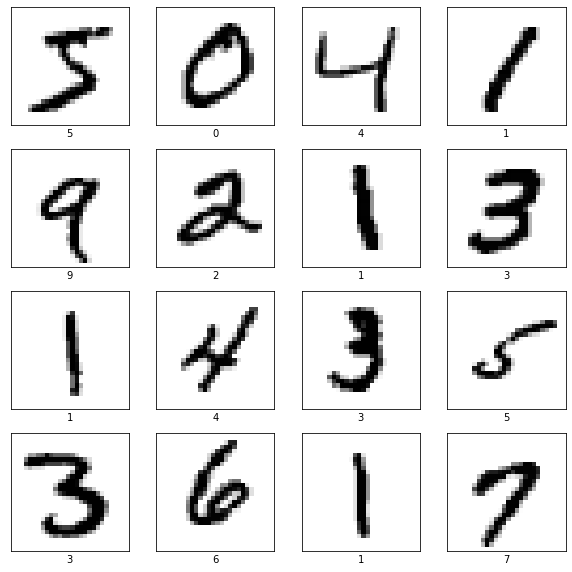

In [3]:
plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# Normalize Data

In [4]:
x_train = np.reshape(x_train, (60000, 784))
x_train = x_train / 255.

x_test = np.reshape(x_test, (10000, 784))
x_test = x_test / 255.

# Create a Neural Network Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model

In [8]:
_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20, batch_size=1024,
    verbose=2
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 1s - loss: 2.1994 - accuracy: 0.3593 - val_loss: 1.9857 - val_accuracy: 0.6710
Epoch 2/20
60000/60000 - 0s - loss: 1.7957 - accuracy: 0.6828 - val_loss: 1.5774 - val_accuracy: 0.7260
Epoch 3/20
60000/60000 - 0s - loss: 1.3886 - accuracy: 0.7427 - val_loss: 1.1907 - val_accuracy: 0.7763
Epoch 4/20
60000/60000 - 0s - loss: 1.0471 - accuracy: 0.7973 - val_loss: 0.9006 - val_accuracy: 0.8376
Epoch 5/20
60000/60000 - 0s - loss: 0.8084 - accuracy: 0.8505 - val_loss: 0.7101 - val_accuracy: 0.8699
Epoch 6/20
60000/60000 - 0s - loss: 0.6540 - accuracy: 0.8751 - val_loss: 0.5875 - val_accuracy: 0.8869
Epoch 7/20
60000/60000 - 0s - loss: 0.5524 - accuracy: 0.8868 - val_loss: 0.5048 - val_accuracy: 0.8963
Epoch 8/20
60000/60000 - 0s - loss: 0.4820 - accuracy: 0.8960 - val_loss: 0.4462 - val_accuracy: 0.9027
Epoch 9/20
60000/60000 - 0s - loss: 0.4308 - accuracy: 0.9015 - val_loss: 0.4034 - val_accuracy: 0.9095
Epoch 10/20
60

# Save the Model

In [9]:
model.save('model.h5')